# CH03. Neural Network

### 3.2.2 계단함수 구현하기

In [1]:
def step_function(x):
    if x>0:
        return 1
    else:
        return 0

- NumPy 지원 함수로 변환

In [2]:
import numpy as np

In [3]:
def step_function(x):
    y = x > 0
    return y.astype(np.int)

In [4]:
import numpy as np

x = np.array([-1.0, 0, 1.0, 2.0])

In [5]:
step_function(x)

array([0, 0, 1, 1])

### 3.2.3 계단 함수의 그래프

In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
def step_function(x):
    return np.array(x>0, dtype=np.int)

In [11]:
x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)

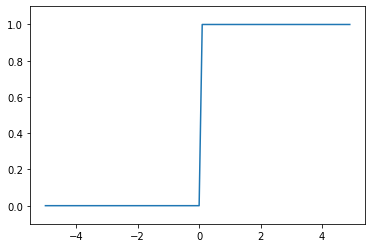

In [12]:
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

### 3.2.4 Sigmoid 함수 구현하기

In [13]:
import numpy as np

def sigmoid(x):
    return 1/(1+np.exp(-x))

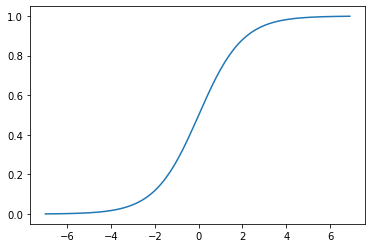

In [14]:
x = np.arange(-7.0, 7.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.show()

### 3.2.5 Sigmoid Function & Step Function

In [15]:
import numpy as np
import matplotlib.pyplot as plt

def step_function(x):
    return np.array(x>0, dtype=np.int)

def sigmoid(x):
    return 1/(1+np.exp(-x))

In [16]:
x = np.arange(-5.0, 5.0, 0.1)
y1 = step_function(x)
y2 = sigmoid(x)

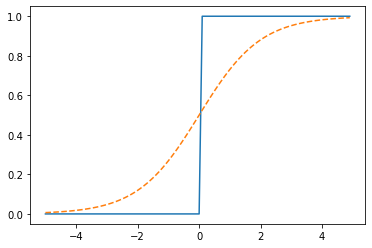

In [17]:
plt.plot(x, y1)
plt.plot(x, y2, linestyle='dashed')
plt.show()

### 3.2.7 ReLU 함수

In [18]:
import numpy as np
import matplotlib.pyplot as plt

In [19]:
def relu(x):
    return np.maximum(0, x)

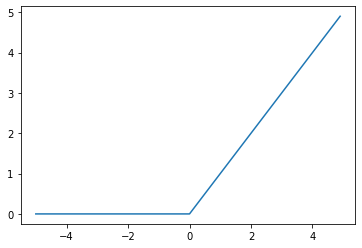

In [20]:
x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)
plt.plot(x, y)
plt.show()

### 3.3.1 다차원 배열

In [21]:
import numpy as np

In [22]:
A = np.array([1, 2, 3, 4])

In [23]:
A

array([1, 2, 3, 4])

In [24]:
np.ndim(A)

1

In [25]:
A.shape

(4,)

In [26]:
B = np.array([[1, 2], [3, 4], [5, 6]])
B

array([[1, 2],
       [3, 4],
       [5, 6]])

In [27]:
np.ndim(B)

2

In [28]:
B.shape

(3, 2)

### 3.3.2 행렬의 내적

In [29]:
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])
np.dot(A, B)

array([[19, 22],
       [43, 50]])

In [30]:
A = np.array([[1, 2],[3, 4], [5, 6]])
B = np.array([[7, 8, 9], [10, 11, 12]])
np.dot(A, B)

array([[ 27,  30,  33],
       [ 61,  68,  75],
       [ 95, 106, 117]])

----

In [31]:
A=np.array([[1, 2], [3, 4], [5, 6]])
B=np.array([7,8])

In [32]:
A.shape, B.shape

((3, 2), (2,))

In [33]:
np.dot(A, B)

array([23, 53, 83])

### 3.3.3 신경망의 내적

In [34]:
X = np.array([1, 2])
W = np.array([[1, 3, 5], [2, 4, 6]])
Y = np.dot(W.T, X)

In [35]:
Y

array([ 5, 11, 17])

## 3.4 3층 신경망 구현하기

In [36]:
X=np.array([[1.0], [0.5]])

In [37]:
W1 = np.array([[0.1, 0.3, 0.5],[0.2, 0.4, 0.6]])
B1 = np.array([[0.1], [0.2], [0.3]])

In [38]:
A1 = np.dot(W1.T, X)+B1

In [39]:
A1

array([[0.3],
       [0.7],
       [1.1]])

- 1층의 활성함수 통과, 출력값

In [40]:
Z1 = sigmoid(A1)

In [41]:
A1

array([[0.3],
       [0.7],
       [1.1]])

In [42]:
Z1

array([[0.57444252],
       [0.66818777],
       [0.75026011]])

- 2층으로 값 전달

In [43]:
W2=np.array([[0.1, 0.4],
            [0.2, 0.5],
            [0.3, 0.6]])
B2=np.array([
    [0.1],
    [0.2]
])

In [44]:
A2 = np.dot(W2.T, Z1)+B2
Z2 = sigmoid(A2)

In [45]:
Z2

array([[0.62624937],
       [0.7710107 ]])

- 출력층으로 전달

In [46]:
def identity(x):
    return x


In [47]:
W3 = np.array([
    [0.1, 0.3],
    [0.2, 0.4]
])
B3 = np.array([
    [0.1],[0.2]
])

In [48]:
A3 = np.dot(W3.T, Z2)+B3
Y = identity(A3)

In [49]:
Y

array([[0.31682708],
       [0.69627909]])

### 3.4.3 구현 정리

In [50]:
def init_network():
    network = {}
    network['W1'] = np.array([
        [0.1, 0.3, 0.5],
        [0.2, 0.4, 0.6]])
    network['b1'] = np.array([[0.1], [0.2],[0.3]])
    network['W2'] = np.array([
        [0.1, 0.4], 
        [0.2, 0.5],
        [0.3, 0.6]
    ])
    network['b2'] =  np.array([[0.1], [0.2]])
    network['W3'] = np.array([
        [0.1, 0.3], 
        [0.2, 0.4]
    ])
    network['b3'] =  np.array([[0.1], [0.2]])
    return network

In [51]:
def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(W1.T, x)+b1
    z1 = sigmoid(a1)
    a2 = np.dot(W2.T, z1)+b2
    z2 = sigmoid(a2)
    a3 = np.dot(W3.T, z2)+b3
    y = identity(a3)
    
    return y
    

In [52]:
network = init_network()
x = np.array([[1.0], [0.5]])
y = forward(network, x)
y

array([[0.31682708],
       [0.69627909]])

### 3.5.1 항등 함수와 소프트맥스

In [53]:
a = np.array([[0.3], [2.9], [4.0]])
exp_a = np.exp(a)
exp_a

array([[ 1.34985881],
       [18.17414537],
       [54.59815003]])

In [54]:
sum_exp_a = np.sum(exp_a)
sum_exp_a

74.1221542101633

In [55]:
y = exp_a/sum_exp_a

In [56]:
y

array([[0.01821127],
       [0.24519181],
       [0.73659691]])

In [57]:
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

In [58]:
softmax(a)

array([[0.01821127],
       [0.24519181],
       [0.73659691]])

### 3.5.3 소프트맥스 함수의 특징

In [59]:
a = np.array([[0.3], [2.9], [4.0]])
y = softmax(a)

In [60]:
y

array([[0.01821127],
       [0.24519181],
       [0.73659691]])

In [61]:
np.sum(y)

1.0

## 3.6 손글씨 솟자 인식

In [62]:
import warnings
warnings.filterwarnings('ignore')

In [63]:
from tensorflow.keras.datasets import mnist

In [64]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [65]:
train_images.shape

(60000, 28, 28)

In [66]:
img = train_images[0]

In [67]:
label = train_labels[0]

In [68]:
import matplotlib.pyplot as plt

(<matplotlib.image.AxesImage at 0x7f94e7535630>, 5)

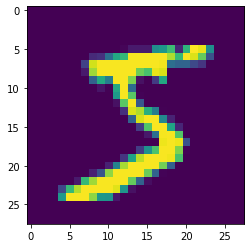

In [69]:
plt.imshow(img), label

### 3.6.2 신경망 추론 처리

- 데이터 로딩

In [70]:
img = train_images[0]
label = train_labels[0]

In [71]:
img = img.reshape(28, 28)

(<matplotlib.image.AxesImage at 0x7f94e748cd68>, 5)

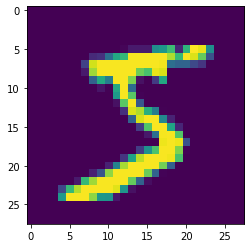

In [72]:
plt.imshow(img), label

- nomalization

In [73]:
import numpy as np

def normalized(data, mean, std):
    return (data-mean)/std

- flatten

In [74]:
def flatten(data, flatten_size):
    return data.reshape(-1, flatten_size)

- MNIST 데이터 로딩

In [75]:
def get_data():
    (train_images, train_labels), (test_images, test_labels) = mnist.load_data()
    
    mean = np.sum(train_images)/train_images.size
    std = np.std(train_images)
    
    train_images=flatten(train_images, 28*28)
    train_images= normalized(train_images, mean, std)
    test_images=flatten(test_images, 28*28)
    test_images=normalized(test_images, mean, std)
   
    return train_images, train_labels, test_images, test_labels


In [76]:
train_images, train_labels, test_images, test_labels = get_data()

In [77]:
#Train = 60k, Test = 10k

train_images.shape, test_images.shape

((60000, 784), (10000, 784))

In [78]:
import pickle

def init_network():
    with open("./ref/sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
    
    return network

In [85]:
def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(W1.T, x)
    z1 = sigmoid(a1)
    
    a2 = np.dot(W2.T, z1)
    z2 = sigmoid(a2)
    
    a3 = np.dot(W3.T, z2)
    y = softmax(a3)
    
    return y


In [86]:
network = init_network()

In [106]:
network['W1'].shape, network['W2'].shape, network['W3'].shape

((784, 50), (50, 100), (100, 10))

#### 이미지 추론

##### 1개 이미지 데이터 추론

In [108]:
results = predict(network, train_images[0].T)

In [109]:
"추론 결과:", np.argmax(results)

('추론 결과:', 5)

##### 여러개 이미지 데이터 추론

In [110]:
results = predict(network, train_images.T)

In [111]:
"추론 결과:", np.argmax(results, axis=0)

('추론 결과:', array([5, 0, 4, ..., 5, 6, 9]))

#### 정확도 측정

In [124]:
train_images, train_labels, test_images, test_labels = get_data()

network = init_network()

results = predict(network, train_images.T)
results = np.argmax(results, axis=0)

correct_data = (results == train_labels )

In [125]:
correct_data

array([ True,  True,  True, ...,  True,  True, False])

In [126]:
np.sum(correct_data)/len(train_images)

0.8926166666666666